In [1]:
# import OSMPythonTools, install if not already installed
try: 
  import OSMPythonTools as osm
except ModuleNotFoundError:
  !pip install OSMPythonTools
  import OSMPythonTools as osm

# import wrapped osmnx
try: 
  import osmnx as ox
except ModuleNotFoundError:
  !pip install osmnx
  import osmnx as ox

import networkx as nx

In [4]:
# extract road network from OSM and pack into an nx.MultiDiGraph
G = ox.graph_from_place('CH-ZH', network_type='drive')

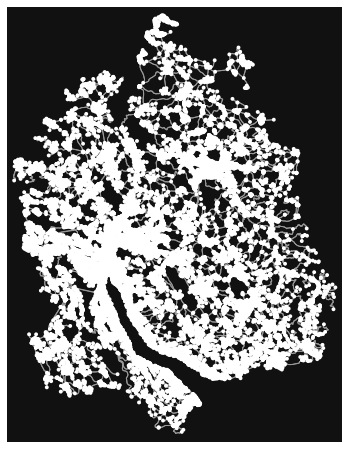

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
# plot the weighted directed graph with geo-coordinates
ox.plot_graph(G)

In [2]:
# a list of cantons in Switzerland
canton_list = ["AG","AI","AR","BS","BL","BE","FR","GE","GL","GR","JU","LU","NE","NW","OW","SH","SZ","SO","SG","TG","TI","UR","VS","VD","ZG","ZH"]

In [3]:
# query the road network of switzerland and save as .csv
import pandas as pd
for canton in canton_list:
  G = ox.graph_from_place(f'CH-{canton}', network_type='drive') # extract the road network of a canton
  edgeset = set([e[:2] for e in G.edges]) # unpacking and deduplication
  pd.DataFrame(edgeset).to_csv(f'edges_by_canton/{canton}', index = False, header = False, mode = 'w+') # save to hd.
  print(f'{canton} is processed with {len(edgeset)} edges')

AG is processed with 61481 edges
AI is processed with 1398 edges
AR is processed with 4946 edges
BS is processed with 5576 edges
BL is processed with 22502 edges
BE is processed with 88637 edges
FR is processed with 32191 edges
GE is processed with 17183 edges
GL is processed with 5645 edges
GR is processed with 22644 edges
JU is processed with 10983 edges
LU is processed with 27584 edges
NE is processed with 14006 edges
NW is processed with 2638 edges
OW is processed with 2832 edges
SH is processed with 6506 edges
SZ is processed with 11864 edges
SO is processed with 26020 edges
SG is processed with 43394 edges
TG is processed with 31914 edges
TI is processed with 28936 edges
UR is processed with 2616 edges
VS is processed with 35811 edges
VD is processed with 58761 edges
ZG is processed with 5674 edges
ZH is processed with 76584 edges


In [19]:
# consolidate cantonal data
swiss_edgelist = []
for canton in canton_list:
  edges = open(f'edges_by_canton/{canton}', 'r').readlines()
  for edge in edges:
    e = edge.rstrip().split(',')
    swiss_edgelist.append((int(e[0]),int(e[1])))

swiss_edgeset = set(swiss_edgelist)

file_name = 'osmswitzerland'
with open(file_name, 'w') as f:
    for e in edgeset:
        f.write(f"{e[0]}, {e[1]}\n")

In [20]:
len(swiss_edgeset)

648326